In [5]:
import klib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error,r2_score


In [4]:
pip install klib


  Using cached klib-1.3.2-py3-none-any.whl.metadata (7.4 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached screeninfo-0.8.1-py3-none-any.whl.metadata (2.9 kB)
Using cached klib-1.3.2-py3-none-any.whl (23 kB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Using cached screeninfo-0.8.1-py3-none-any.whl (12 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
df=pd.read_csv('sales_data.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            999 non-null    float64
 1   Sale_Date             998 non-null    object 
 2   Sales_Rep             999 non-null    object 
 3   Region                997 non-null    object 
 4   Sales_Amount          999 non-null    float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      999 non-null    object 
 7   Unit_Cost             998 non-null    float64
 8   Unit_Price            998 non-null    float64
 9   Customer_Type         998 non-null    object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        999 non-null    object 
 12  Sales_Channel         998 non-null    object 
 13  Region_and_Sales_Rep  999 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 109.5+ KB


In [32]:
df.isnull().sum()

Product_ID              1
Sale_Date               2
Sales_Rep               1
Region                  3
Sales_Amount            1
Quantity_Sold           0
Product_Category        1
Unit_Cost               2
Unit_Price              2
Customer_Type           2
Discount                0
Payment_Method          1
Sales_Channel           2
Region_and_Sales_Rep    1
dtype: int64

In [33]:
for col in df.columns:
  if df[col].dtype=='object':
    df[col].fillna(df[col].mode()[0],inplace=True)
  else:
    df[col].fillna(df[col].mean(),inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_17352\1330594439.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_17352\1330594439.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [34]:
df.isnull().sum()

Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64

In [36]:
cardinality=df.nunique()

In [37]:
for col in df.columns:
    if df[col].dtype=='object':
        if cardinality[col]<=5:
            df=pd.get_dummies(df,columns=[col],dtype=int,drop_first=True)
        else:
            le=LabelEncoder()
            df[col]=le.fit_transform(df[col])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Product_ID                    1000 non-null   float64
 1   Sale_Date                     1000 non-null   int64  
 2   Sales_Amount                  1000 non-null   float64
 3   Quantity_Sold                 1000 non-null   int64  
 4   Unit_Cost                     1000 non-null   float64
 5   Unit_Price                    1000 non-null   float64
 6   Discount                      1000 non-null   float64
 7   Region_and_Sales_Rep          1000 non-null   int64  
 8   Sales_Rep_Bob                 1000 non-null   int64  
 9   Sales_Rep_Charlie             1000 non-null   int64  
 10  Sales_Rep_David               1000 non-null   int64  
 11  Sales_Rep_Eve                 1000 non-null   int64  
 12  Region_North                  1000 non-null   int64  
 13  Regi

In [39]:
num_col=df.select_dtypes(include=['int64','int32']).columns

In [40]:
num_col

Index(['Sale_Date', 'Quantity_Sold', 'Region_and_Sales_Rep', 'Sales_Rep_Bob',
       'Sales_Rep_Charlie', 'Sales_Rep_David', 'Sales_Rep_Eve', 'Region_North',
       'Region_South', 'Region_West', 'Product_Category_Electronics',
       'Product_Category_Food', 'Product_Category_Furniture',
       'Customer_Type_Returning', 'Payment_Method_Cash',
       'Payment_Method_Credit Card', 'Sales_Channel_Retail'],
      dtype='object')

In [41]:
scaler=StandardScaler()

In [42]:
df[num_col]=scaler.fit_transform(df[num_col])

In [43]:
df.head()

,Product_ID,Sale_Date,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount,Region_and_Sales_Rep,Sales_Rep_Bob,Sales_Rep_Charlie,...,Region_North,Region_South,Region_West,Product_Category_Electronics,Product_Category_Food,Product_Category_Furniture,Customer_Type_Returning,Payment_Method_Cash,Payment_Method_Credit Card,Sales_Channel_Retail
0,1052.0,-0.297436,5053.97,-0.519717,152.75,267.22,0.09,-0.571772,1.951331,-0.450965,...,1.644294,-0.538816,-0.565032,-0.571192,-0.538816,1.687055,1.012073,1.481516,-0.727360,-1.026347
1,1093.0,0.176847,4384.02,-0.590379,3816.39,4209.44,0.11,1.164026,1.951331,-0.450965,...,-0.608164,-0.538816,1.769811,-0.571192,-0.538816,1.687055,1.012073,1.481516,-0.727360,0.974329
2,1015.0,1.650152,4631.23,0.328224,261.56,371.40,0.20,0.643287,-0.512471,-0.450965,...,-0.608164,1.855921,-0.565032,-0.571192,1.855921,-0.592749,1.012073,-0.674985,-0.727360,0.974329
3,1072.0,1.387782,2167.94,0.964180,4330.03,4467.75,0.02,0.296127,1.951331,-0.450965,...,-0.608164,1.855921,-0.565032,-0.571192,-0.538816,-0.592749,-0.988071,-0.674985,1.374836,0.974329
4,1061.0,-0.075431,3750.20,-0.873026,637.37,692.71,0.08,-1.266091,-0.512471,2.217467,...,-0.608164,-0.538816,-0.565032,1.750726,-0.538816,-0.592749,-0.988071,-0.674985,1.374836,-1.026347


In [45]:
x=df.drop(columns=['Region_and_Sales_Rep'])

In [47]:
x.head()

,Product_ID,Sale_Date,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount,Sales_Rep_Bob,Sales_Rep_Charlie,Sales_Rep_David,...,Region_North,Region_South,Region_West,Product_Category_Electronics,Product_Category_Food,Product_Category_Furniture,Customer_Type_Returning,Payment_Method_Cash,Payment_Method_Credit Card,Sales_Channel_Retail
0,1052.0,-0.297436,5053.97,-0.519717,152.75,267.22,0.09,1.951331,-0.450965,-0.535725,...,1.644294,-0.538816,-0.565032,-0.571192,-0.538816,1.687055,1.012073,1.481516,-0.727360,-1.026347
1,1093.0,0.176847,4384.02,-0.590379,3816.39,4209.44,0.11,1.951331,-0.450965,-0.535725,...,-0.608164,-0.538816,1.769811,-0.571192,-0.538816,1.687055,1.012073,1.481516,-0.727360,0.974329
2,1015.0,1.650152,4631.23,0.328224,261.56,371.40,0.20,-0.512471,-0.450965,1.866629,...,-0.608164,1.855921,-0.565032,-0.571192,1.855921,-0.592749,1.012073,-0.674985,-0.727360,0.974329
3,1072.0,1.387782,2167.94,0.964180,4330.03,4467.75,0.02,1.951331,-0.450965,-0.535725,...,-0.608164,1.855921,-0.565032,-0.571192,-0.538816,-0.592749,-0.988071,-0.674985,1.374836,0.974329
4,1061.0,-0.075431,3750.20,-0.873026,637.37,692.71,0.08,-0.512471,2.217467,-0.535725,...,-0.608164,-0.538816,-0.565032,1.750726,-0.538816,-0.592749,-0.988071,-0.674985,1.374836,-1.026347


In [48]:
y=df['Region_and_Sales_Rep']

In [ ]:
x_train,x_temp,y_train,y_temp=train_test_split(x,y,test_size=0.2,random_state=42)


In [50]:
x_train.shape

(800, 21)

In [51]:
y_train.shape

(800,)

In [52]:
x_test.shape

(100, 21)

In [53]:
y_test.shape

(100,)

In [56]:
#Model Selection
model=LinearRegression()

In [57]:
linear_model=model.fit(x_train,y_train)

In [58]:
linear_model

LinearRegression()

In [59]:
y_pred=linear_model.predict(x_test)

In [60]:
y_pred

array([-1.4306978 ,  0.29950349, -0.72084616, -1.59895339, -0.72334724,
        1.33389382, -0.03631607,  0.29570585, -0.04551962,  1.49079734,
        0.82310118,  1.14418   , -0.38328329,  1.33116773, -1.3984358 ,
       -0.54102062,  0.83030204,  1.17213856, -0.02480126,  0.63248725,
       -0.21755265,  1.33018388,  1.15791145,  1.1526166 , -0.2099669 ,
       -0.37143915,  1.15808573, -1.09339549,  0.14091668,  1.00201028,
        0.11947417,  0.28898413, -0.02724954, -0.20884316, -0.02494655,
       -0.91882585, -1.60190199,  1.48950737, -0.23361646, -0.36225907,
        1.13953537,  0.62224319,  1.16486106, -1.26136129,  1.00266042,
       -0.92367344, -0.72694041, -0.72586168, -1.43064949, -1.10137021,
        0.2917231 ,  1.49255788, -0.91556981, -0.05011831, -0.3774518 ,
        1.69470916, -1.11029187,  0.44741267,  0.80873119,  0.12372379,
        0.61801806,  0.81021771,  0.62390637,  1.15411241, -0.21646006,
        0.11696893, -0.37884813, -0.37472579, -1.24322201,  1.32

In [61]:
y

0     -0.571772
1      1.164026
2      0.643287
3      0.296127
4     -1.266091
         ...   
995   -0.398192
996   -0.571772
997    0.643287
998    1.511186
999   -1.613251
Name: Region_and_Sales_Rep, Length: 1000, dtype: float64

In [62]:
mse_linear=mean_squared_error(y_test,y_pred)
r2_linear=r2_score(y_test,y_pred)

In [63]:
print(mse_linear)
print(r2_linear)

0.0002860427235338477
0.9996568868058787


# KLIB bn model yaratamiz

In [10]:
df=klib.data_cleaning(df)

Shape of cleaned data: (1000, 14) - Remaining NAs: 19


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.07 MB (-63.64%)



GridSpec(6, 6)

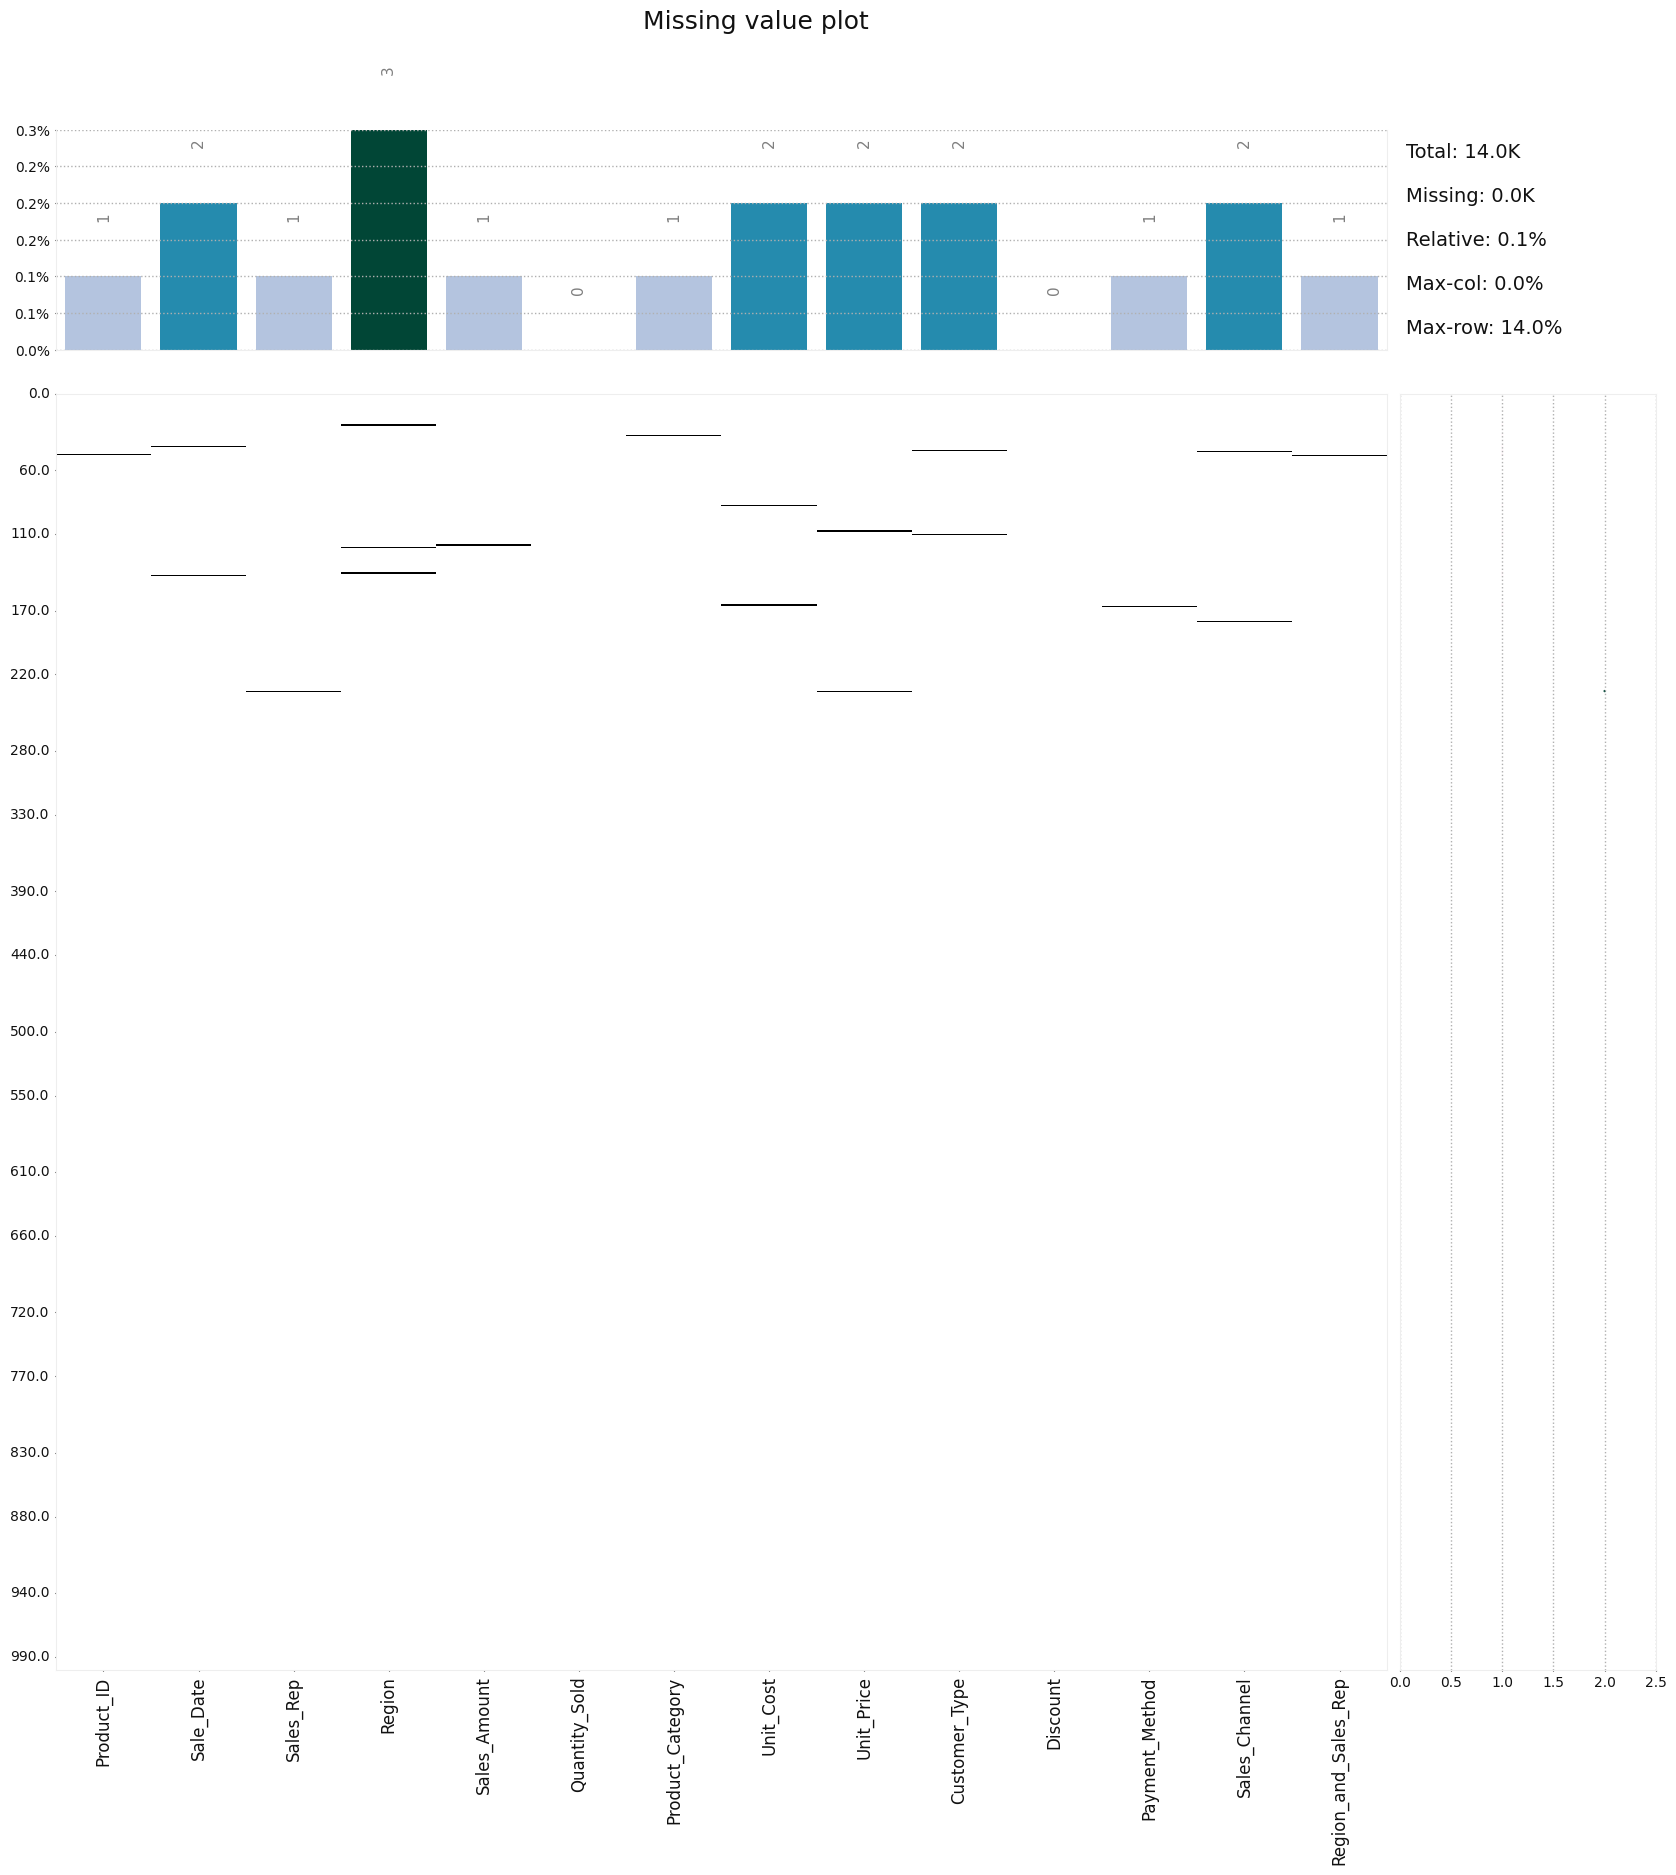

In [9]:
klib.missingval_plot(df) 

In [10]:
klib.corr_interactive_plot(df, figsize=(10,6))  

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'colorscale': [[0.0, 'rgb(84,48,5)'], [0.1, 'rgb(140,81,10)'], [0.2,
                             'rgb(191,129,45)'], [0.3, 'rgb(223,194,125)'], [0.4,
                             'rgb(246,232,195)'], [0.5, 'rgb(245,245,245)'], [0.6,
                             'rgb(199,234,229)'], [0.7, 'rgb(128,205,193)'], [0.8,
                             'rgb(53,151,143)'], [0.9, 'rgb(1,102,94)'], [1.0,
                             'rgb(0,60,48)']],
              'hoverongaps': False,
              'text': array([['', -0.02, -0.02, -0.01, 0.02, -0.02],
                             ['', '', 1.0, 0.06, 0.02, 0.02],
                             ['', '', '', 0.06, 0.01, 0.02],
                             ['', '', '', '', -0.04, 0.1],
                             ['', '', '', '', '', 0.01],
                             ['', '', '', '', '', '']], dtype=object),
              'textfont': {'size': 12},
              'texttemplate': '%{text}',
              'type': 'heatmap',
              'x': array(['Discount', 'Unit_Price', 'Unit_Cost', 'Quantity_Sold', 'Sales_Amount',
                          'Product_ID'], dtype=object),
              'xgap': 1,
              'y': array(['Discount', 'Unit_Price', 'Unit_Cost', 'Quantity_Sold', 'Sales_Amount',
                          'Product_ID'], dtype=object),
              'ygap': 1,
              'z': {'bdata': ('AAAAAAAA+H9zfsNxSQyTv2sSB+QsRJ' ... 'AAAAAA+H8AAAAAAAD4fwAAAAAAAPh/'),
                    'dtype': 'f8',
                    'shape': '6, 6'},
              'zmax': np.float64(0.95),
              'zmin': np.float64(0.01)}],
    'layout': {'autosize': True,
               'height': 1591.4965034965032,
               'template': '...',
               'title': {'font': {'size': 24}, 'text': 'Feature-correlation (pearson)', 'x': 0.5},
               'width': 2273.5664335664333,
               'xaxis': {'autorange': 'reversed'}}
})

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            999 non-null    float64
 1   Sale_Date             998 non-null    object 
 2   Sales_Rep             999 non-null    object 
 3   Region                997 non-null    object 
 4   Sales_Amount          999 non-null    float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      999 non-null    object 
 7   Unit_Cost             998 non-null    float64
 8   Unit_Price            998 non-null    float64
 9   Customer_Type         998 non-null    object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        999 non-null    object 
 12  Sales_Channel         998 non-null    object 
 13  Region_and_Sales_Rep  999 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 109.5+ KB


In [12]:
df=klib.data_cleaning(df, drop_duplicates=True)

Shape of cleaned data: (1000, 14) - Remaining NAs: 19


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.07 MB (-63.64%)



In [13]:
df.info()  # korib turganimizdek bu yerda memory usage ancha kamaydi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   product_id            999 non-null    float32 
 1   sale_date             998 non-null    string  
 2   sales_rep             999 non-null    category
 3   region                997 non-null    category
 4   sales_amount          999 non-null    float32 
 5   quantity_sold         1000 non-null   int8    
 6   product_category      999 non-null    category
 7   unit_cost             998 non-null    float32 
 8   unit_price            998 non-null    float32 
 9   customer_type         998 non-null    category
 10  discount              1000 non-null   float32 
 11  payment_method        999 non-null    category
 12  sales_channel         998 non-null    category
 13  region_and_sales_rep  999 non-null    category
dtypes: category(7), float32(5), int8(1), string(1)
memory usa

# Datacleaner

In [22]:
pip install data_cleaner

     ---------------------------------------- 0.0/648.4 kB ? eta -:--:--
      --------------------------------------- 10.2/648.4 kB ? eta -:--:--
     -- ---------------------------------- 41.0/648.4 kB 495.5 kB/s eta 0:00:02
     --------------------- ---------------- 358.4/648.4 kB 2.8 MB/s eta 0:00:01
     -------------------------------------  645.1/648.4 kB 3.7 MB/s eta 0:00:01
     -------------------------------------  645.1/648.4 kB 3.7 MB/s eta 0:00:01
     -------------------------------------  645.1/648.4 kB 3.7 MB/s eta 0:00:01
     -------------------------------------  645.1/648.4 kB 3.7 MB/s eta 0:00:01
     -------------------------------------  645.1/648.4 kB 3.7 MB/s eta 0:00:01
     -------------------------------------- 648.4/648.4 kB 1.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'don

  error: subprocess-exited-with-error
  
  × Building wheel for cchardet (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [24 lines of output]
      C:\Users\User\AppData\Local\Temp\pip-build-env-fgpqw8zs\overlay\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
      !!
      
              ********************************************************************************
              Please consider removing the following classifiers in favor of a SPDX license expression:
      
              License :: OSI Approved :: Mozilla Public License 1.1 (MPL 1.1)
              License :: OSI Approved :: GNU General Public License (GPL)
              License :: OSI Approved :: GNU Library or Lesser General Public License (LGPL)
      
              See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
              *****************************************************************

In [24]:
from data_cleaner import autoclean

ModuleNotFoundError: No module named 'data_cleaner'

In [14]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from tabulate import tabulate

In [20]:
data=[
    ['taxi',15,5000 ],
    ['scooter',20,2000],
    ['bycicle',30,'free']
]
headers=['transport type','time','price']

In [ ]:
table=tabulate(data,headers,tablefmt='grid')    # table format grid qilamiz

In [22]:
print(table)

+------------------+--------+---------+
| transport type   |   time | price   |
+==================+========+=========+
| taxi             |     15 | 5000    |
+------------------+--------+---------+
| scooter          |     20 | 2000    |
+------------------+--------+---------+
| bycicle          |     30 | free    |
+------------------+--------+---------+
